<a href="https://colab.research.google.com/github/sarahasan17/Indian-Premier-League-2018-Batting-and-Bowling-Analysis/blob/main/using_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset=pd.read_csv('total_data_na.csv')
X=dataset.iloc[:,[8,-8]].values

In [9]:
print(X)

[[134.     0.  ]
 [174.54   0.  ]
 [190.9    0.  ]
 [118.21   0.  ]
 [125.42   0.  ]
 [149.75   0.  ]
 [184.79  13.  ]
 [ 84.21  24.  ]
 [115.94   3.  ]
 [165.51   2.  ]
 [121.73   8.  ]
 [ 81.25   9.  ]
 [144.31   0.  ]
 [156.25   5.  ]
 [146.03   0.  ]
 [130.23   0.  ]
 [176.92   3.  ]
 [ 89.47   8.  ]
 [155.95   2.  ]
 [153.65   0.  ]
 [ 77.27   3.  ]
 [116.16   1.  ]
 [ 78.78   4.  ]
 [115.62   0.  ]
 [172.41  10.  ]
 [107.4    0.  ]
 [147.77   0.  ]
 [154.94  14.  ]
 [138.4    0.  ]
 [125.58   0.  ]
 [ 96.59   0.  ]
 [140.83   5.  ]
 [ 80.55   7.  ]
 [133.33  18.  ]
 [181.81   7.  ]
 [121.27   0.  ]
 [149.45   0.  ]
 [127.65   0.  ]
 [128.94  11.  ]
 [ 71.42  15.  ]
 [155.24   0.  ]
 [ 90.     0.  ]
 [142.44   0.  ]
 [136.19   0.  ]
 [109.09   0.  ]
 [133.     0.  ]
 [196.87  11.  ]
 [145.22  12.  ]
 [158.41   0.  ]
 [ 95.23   0.  ]
 [117.02   0.  ]
 [135.48   0.  ]
 [115.44   0.  ]
 [106.81   0.  ]
 [130.26   3.  ]
 [127.65   0.  ]
 [ 87.5   15.  ]
 [145.45   2.  ]
 [167.39   3. 

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

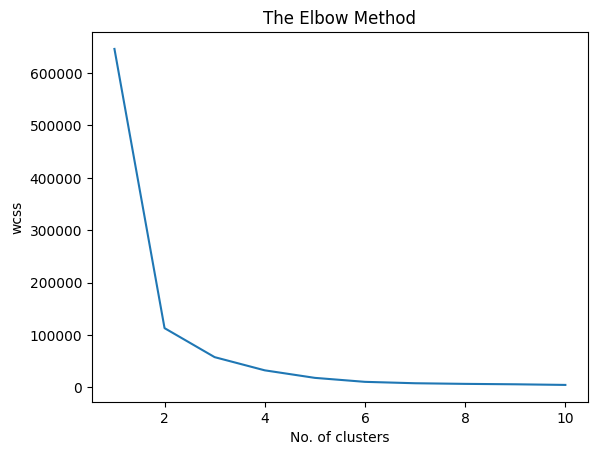

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

## Training the K-Means model on the dataset

In [11]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
print(y_kmeans)

[0 2 2 0 0 0 2 3 0 2 0 3 0 2 0 0 2 3 2 2 3 0 3 0 2 3 0 2 0 0 3 0 3 0 2 0 0
 0 0 3 2 3 0 0 3 0 2 0 2 3 0 0 0 3 0 0 3 0 2 0 0 0 0 0 3 2 0 0 0 2 0 0 3 2
 0 0 0 0 0 0 2 4 0 3 0 3 0 0 0 2 0 0 0 3 0 0 2 0 0 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Visualising the clusters

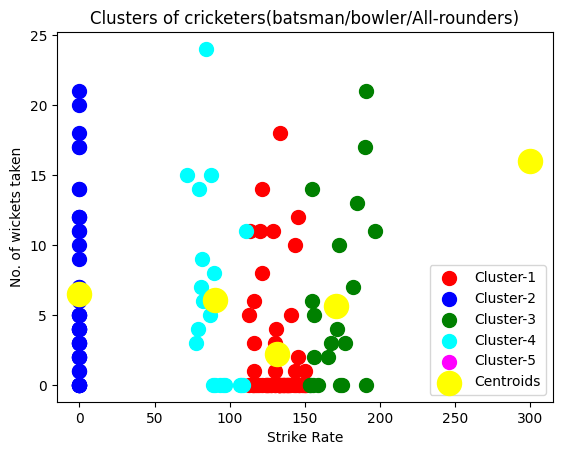

In [13]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster-1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster-2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster-3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster-4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of cricketers(batsman/bowler/All-rounders)')
plt.xlabel('Strike Rate')
plt.ylabel('No. of wickets taken')
plt.legend()
plt.show()